In [1]:
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs
from emanu import plots as ePlots

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def readB123(mneut, i, nzbin, BorQ='Q'): 
    ''' wrapper for Obvs.B123_halo
    '''
    if isinstance(i, int):         
        i_k, j_k, l_k, B123, Q123, cnts, k_f = Obvs.B123_halo(mneut, i, nzbin, 
                                                        Lbox=1000., 
                                                        zspace=False, 
                                                        mh_min=3200., 
                                                        Ngrid=360, 
                                                        Nmax=40, 
                                                        Ncut=3, 
                                                        step=3)
    elif isinstance(i, (list, np.ndarray)):
        i_k, j_k, l_k, B123, Q123, cnts = [], [], [], [], [], []
        for ii, _i in enumerate(i): 
            i_k_i, j_k_i, l_k_i, B123_i, Q123_i, cnts_i, _ = Obvs.B123_halo(mneut, _i, nzbin, 
                                                        Lbox=1000., 
                                                        zspace=False, 
                                                        mh_min=3200., 
                                                        Ngrid=360, 
                                                        Nmax=40, 
                                                        Ncut=3, 
                                                        step=3)
            i_k.append(i_k_i)
            j_k.append(j_k_i)
            l_k.append(l_k_i)
            B123.append(B123_i)
            Q123.append(Q123_i)
            cnts.append(cnts_i)
        i_k = np.average(i_k, axis=0)
        j_k = np.average(j_k, axis=0)
        l_k = np.average(l_k, axis=0)
        B123 = np.average(B123, axis=0)
        Q123 = np.average(Q123, axis=0)
        cnts = np.average(cnts, axis=0)
        
    if BorQ == 'B': 
        return i_k, j_k, l_k, B123, cnts
    elif BorQ == 'Q': 
        return i_k, j_k, l_k, Q123, cnts

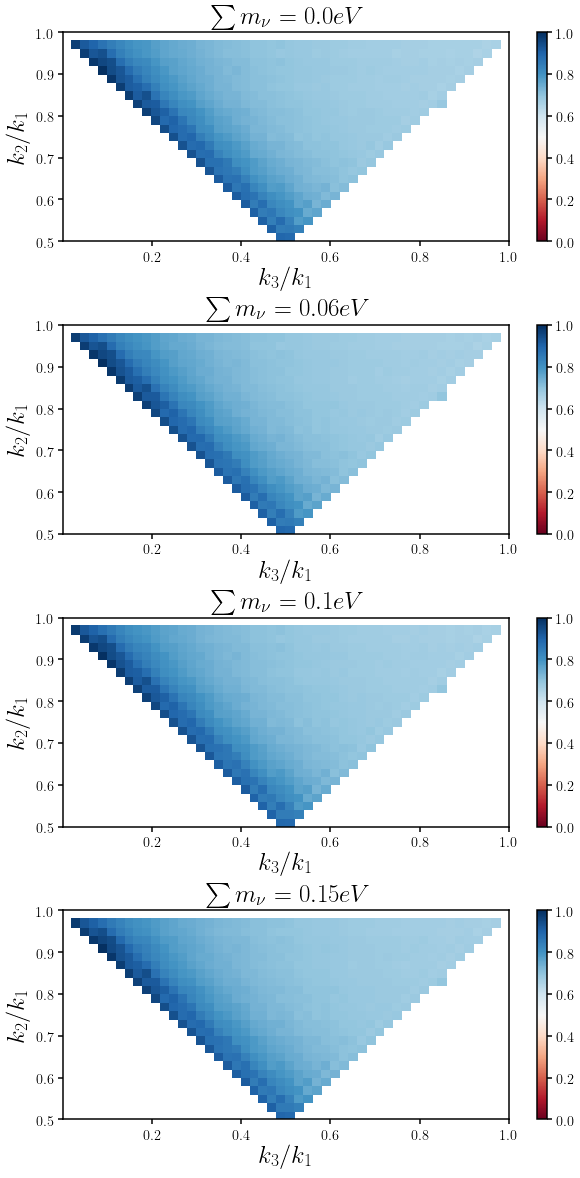

In [4]:
fig = plt.figure(figsize=(10,20))
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    sub = fig.add_subplot(4,1,i+1)
    i_k, j_k, l_k, Q123, cnts = readB123(mneut, range(1,11), 4, BorQ='Q')
    sub = ePlots.plotBk('shape', i_k, j_k, l_k, Q123, cnts, nbin=50, ax=sub, cmap='RdBu')
    sub.set_title(r'$\sum m_\nu ='+str(mneut)+'eV$', fontsize=25)
fig.subplots_adjust(hspace=0.4)

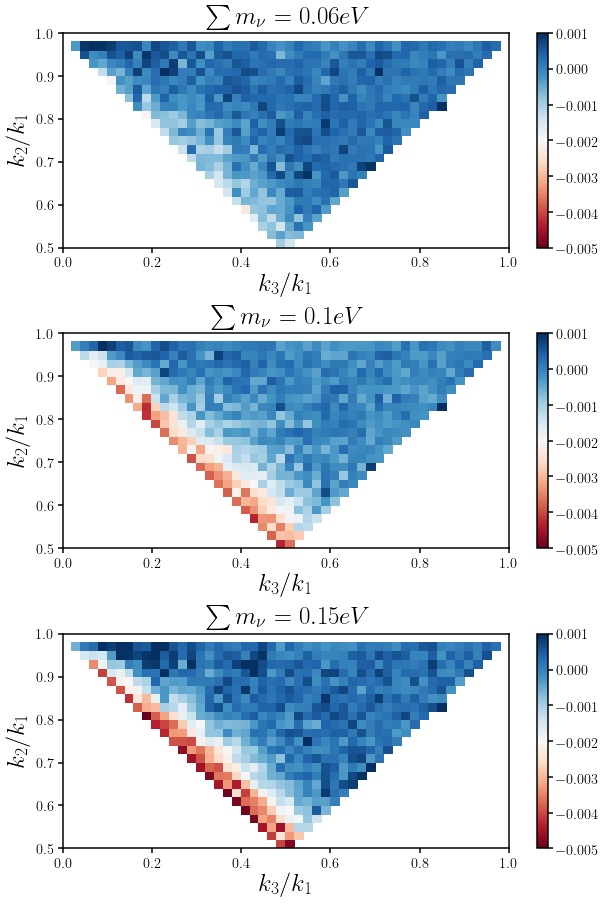

In [5]:
nbin = 50
x_bins = np.linspace(0., 1., nbin+1)
y_bins = np.linspace(0.5, 1., (nbin//2) + 1) 

fig = plt.figure(figsize=(10,15))
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, Q123, cnts = readB123(mneut, range(1,11), 4, BorQ='Q')
    if i == 0: 
        Q123_0 = Q123
    else: 
        sub = fig.add_subplot(3,1,i)
        Qgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, Q123-Q123_0, cnts, x_bins, y_bins)
        bplot = plt.pcolormesh(x_bins, y_bins, Qgrid.T, vmin=-0.005, vmax=0.001, cmap='RdBu')
        cbar = plt.colorbar(bplot, orientation='vertical')
        sub.set_title(r'$\sum m_\nu ='+str(mneut)+'eV$', fontsize=25)
        sub.set_xlabel('$k_3/k_1$', fontsize=25)
        sub.set_ylabel('$k_2/k_1$', fontsize=25)
fig.subplots_adjust(hspace=0.4)

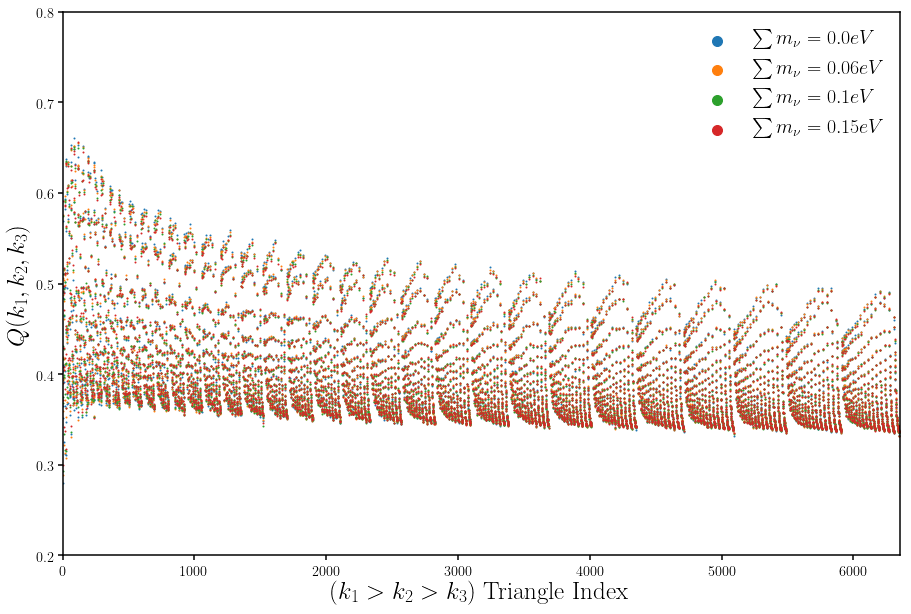

In [6]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, Q123, cnts = readB123(mneut, range(1,11), 4, BorQ='Q')
    sub.scatter(range(len(Q123)), Q123, c='C'+str(i), s=1, label=r'$\sum m_\nu ='+str(mneut)+'eV$')
    sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
    sub.set_xlim([0, len(Q123)])
    sub.set_ylabel('$Q(k_1, k_2, k_3)$', fontsize=25)
    sub.set_ylim([0.2, 0.8])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

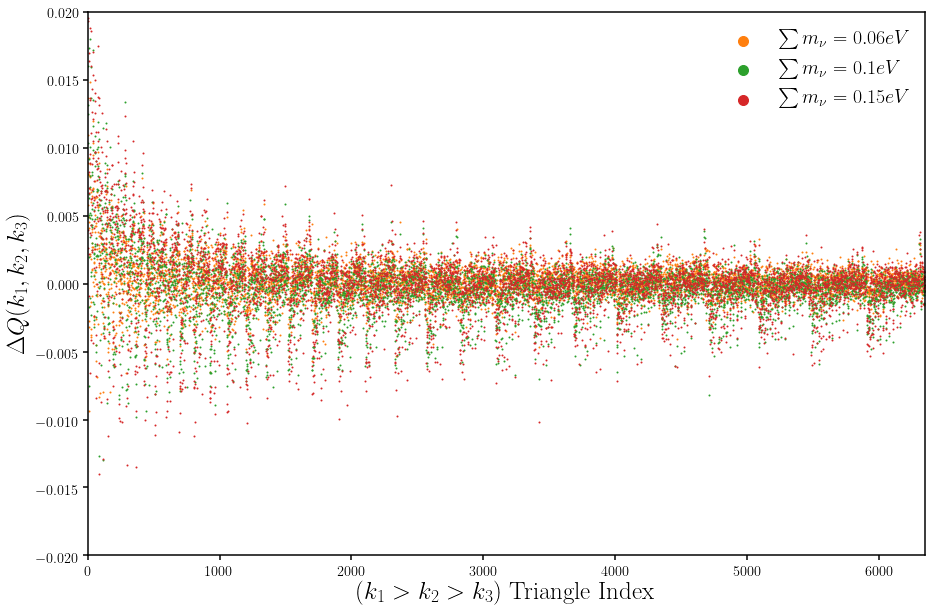

In [7]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, Q123, cnts = readB123(mneut, range(1,11), 4, BorQ='Q')
    if i == 0: 
        Q123_0 = Q123
    else: 
        sub.scatter(range(len(Q123)), Q123-Q123_0, c='C'+str(i), s=1, label=r'$\sum m_\nu ='+str(mneut)+'eV$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([0, len(Q123)])
sub.set_ylabel('$\Delta Q(k_1, k_2, k_3)$', fontsize=25)
sub.set_ylim([-0.02, 0.02])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

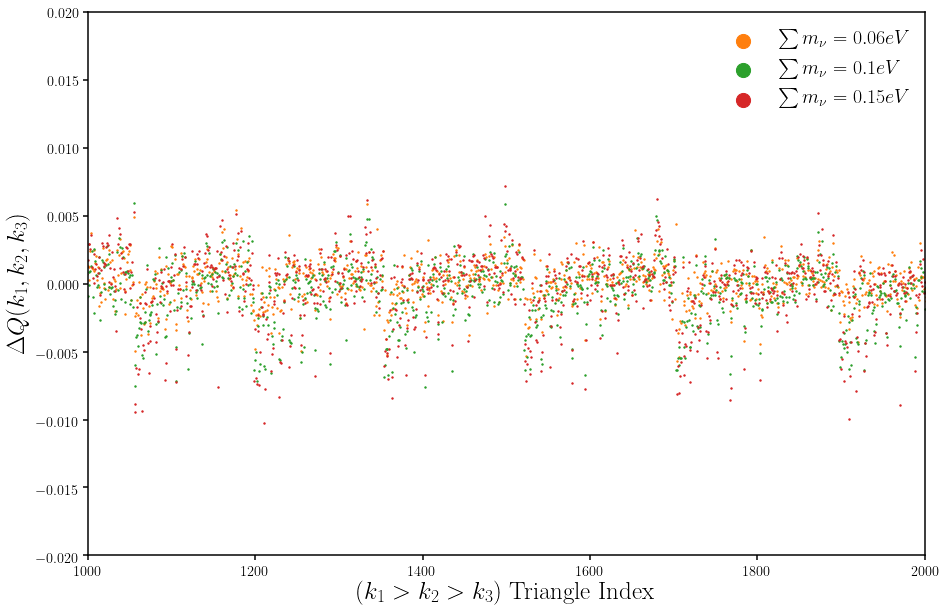

In [8]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, Q123, cnts = readB123(mneut, range(1,11), 4, BorQ='Q')
    if i == 0: 
        Q123_0 = Q123
    else: 
        sub.scatter(range(len(Q123)), Q123-Q123_0, c='C'+str(i), s=2, label=r'$\sum m_\nu ='+str(mneut)+'eV$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([1000, 2000])
sub.set_ylabel('$\Delta Q(k_1, k_2, k_3)$', fontsize=25)
sub.set_ylim([-0.02, 0.02])
sub.legend(loc='upper right', markerscale=10, fontsize=20)